# Data Visualization

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture of its own, but we can explore a few features of Python’s `matplotlib` library here. While there is no official plotting library, `matplotlib` is the de facto standard.

### By the end of this notebook, you'll be able to:
* Create plots using `matplotlib.pyplot`
* Manipulate aspects of plots
* Plot multiple graphs in a single figure

### Table of Contents
1. [Step One: Plotting tools](#one)
2. [Step Two: Load our inflammation data](#two)

<a id="one"></a>

## Step One: Get comfortable with our plotting tools

First, let's get set up for plotting by importing the necessary tool boxes. Below, we will import the `pyplot` module from `matplotlib` as `plt`. 

In [68]:
# Tell Jupyter to plot our plots inline
%matplotlib inline

# Import matplotlib modules
import matplotlib.pyplot as plt # Our main plotting module
import matplotlib as mpl        # Allows us to change plot resolution & default style

print('Plotting packages imported.')

Plotting packages imported.


First, let's create a <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html">random array</a> using our favorite scientific computing toolbox.

In [69]:
# Import numpy
import numpy as np

# Generate a random line from 1 to 100 with 100 values
random_array = np.random.randint(1,100,100)
random_array_2 = random_line*2 

Now, we can use `matplotlib.pyplot` module (imported as `plt` above) to plot our random line.

Useful functions:
* `plt.plot()` create a plot from a list, array, pandas series, etc.
* `plt.show()` show the plot (not strictly necessary in Jupyter, necessary in other IDEs)
* `plt.xlabel()` and `plt.ylabel()` change x and y labels
* `plt.title()` add a title

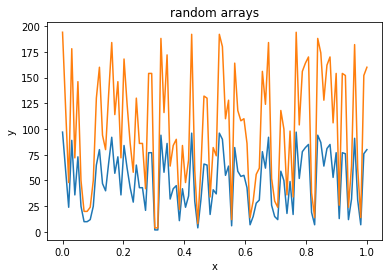

In [71]:
# Plot the data using either plt.plot() or plt.scatter()
number_of_lines = 2
if number_of_lines == 1:
    plt.scatter(random_line)
else:
    plt.plot(np.linspace(0,1,random_line.size),random_line)
    plt.plot(np.linspace(0,1,random_line.size),random_line_2)

#plt.plot(,np.transpose(np.vstack((random_line,random_line_2))))
# Change plot attributes

plt.xlabel('x')
plt.ylabel('y')
plt.title('random arrays')
# Show the plot
plt.show()

The `plt.hist()` function works really similarly (see documentation <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">here</a>).

<div class="alert alert-success"><b>Task</b>: In the cell below:
    
1. Generate a random list of 100 data points from a standard normal distribution (Hint: Use <code>np.random.standard_normal()</code>, documentation <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.standard_normal.html#numpy.random.standard_normal">here</a>).
    
2. Plot a histogram of our the data. 
</div>

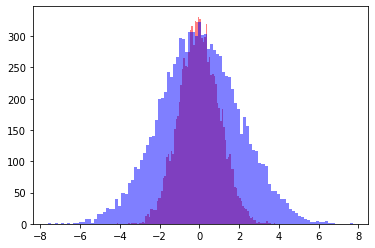

In [66]:
random_normal_1 = np.random.standard_normal(10000)
random_normal_2 = 2*np.random.standard_normal(10000)

a = 0.5
plt.hist(random_normal_1,bins=100,color=[1,0,0,a])
plt.hist(random_normal_2,bins=100,color=[0,0,1,a])


plt.show()

We can also set up multiple subplots on the same figure using `plt.subplots()`. This also creates separate **axes** (really, separate plots) which we can access and manipulate, particularly if you are plotting multiple lines. It's common to use the `subplots` command for easier access to axis attributes.

In [72]:
# Get information about subplots
plt.subplots?

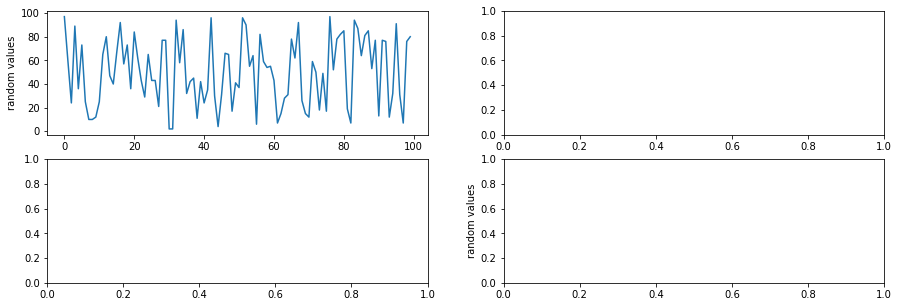

In [73]:
# Generate a figure with subplots
fig, ax = plt.subplots(2,2,figsize=(15,5))

# Plot our line on the first axis, [0,0]
ax[0,0].plot(random_line)

# Update axis parameters
ax[0,0].set_ylabel('random values')

# Update general plot parameters
plt.ylabel('random values') # Compare what this does versus ax.set_ylabel

plt.show()

There are *many, many* different aspects of a figure that you could manipulate (and spend a lot of time manipulating). 

Style guides help with this a bit, they set a few good defaults. Below, we are setting figure parameters, and choosing a figure style (see all styles <a href="https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html">here</a>, or how to create your own style <a href="https://matplotlib.org/tutorials/introductory/customizing.html">here</a>.)

You can test how these parameters change our plots by going back and re-plotting the plots above.

In [ ]:
# Set the figure "dots per inch" to be higher than the default (optional, based on your personal preference)
mpl.rcParams['figure.dpi'] = 100

# (Optional) Choose a figure style
print(plt.style.available)
plt.style.use('seaborn-talk')

## Step Two: Load our inflammation data and plot

As we saw in the NumPy notebook, 'inflammation.csv' contains information about patient's inflammation ratings over many days. It is a two-dimensional dataset. As such, we can visualize it as a heatmap using the `imshow` function.

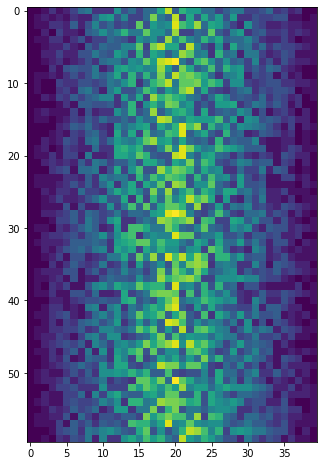

In [97]:
data = np.loadtxt(fname='Data/inflammation-01.csv', delimiter=',')
plt.figure(figsize=(8,8))
plt.imshow(data)
plt.show()

Each row in the heat map corresponds to a patient in the clinical trial dataset, and each column corresponds to a day in the dataset. Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, the general number of inflammation flare-ups for the patients rises and falls over a 40-day period.

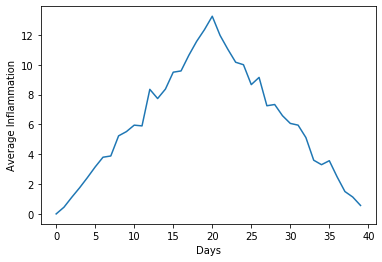

In [98]:
# Your code here
ave_inflammation = np.mean(data, axis=0)
ave_plot = plt.plot(ave_inflammation)
plt.xlabel('Days')
plt.ylabel('Average Inflammation')
plt.show()

Here, we have put the average inflammation per day across all patients in the variable ave_inflammation, then asked matplotlib.pyplot to create and display a line graph of those values. The result is a reasonably linear rise and fall, in line with idea that this medication takes 3 weeks to take effect. But a good data scientist doesn’t just consider the average of a dataset, so let’s have a look at two other statistics.

<div class="alert alert-success">

**Task**: Using the <code>numpy.min</code> and <code>numpy.max</code> functions we've seen before, and the <code>plt.plot()</code> function you learned above, plot the maximum and minimum inflammation over time. Plot these in three plots, side by side.

</div> 

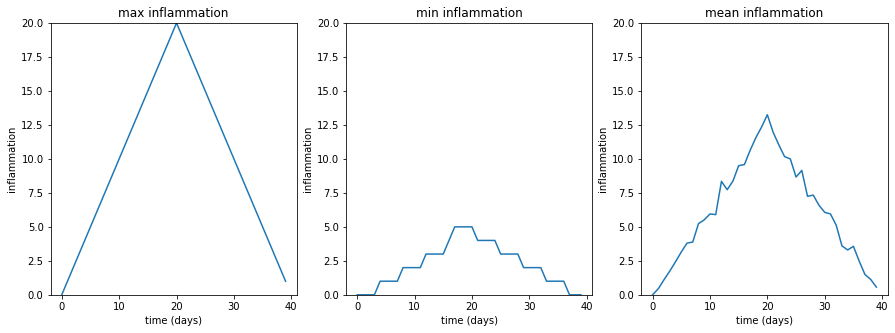

In [111]:
# Your code here
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(np.max(data,axis=0))
ax[1].plot(np.min(data,axis=0))
ax[2].plot(np.mean(data,axis=0))

ax[0].set_title('max inflammation')
ax[1].set_title('min inflammation')
ax[2].set_title('mean inflammation')

ax[0].set_xlabel('time (days)')
ax[1].set_xlabel('time (days)')
ax[2].set_xlabel('time (days)')

ax[0].set_ylabel('inflammation')
ax[1].set_ylabel('inflammation')
ax[2].set_ylabel('inflammation')

ax[0].set_ylim((0,20))
ax[1].set_ylim((0,20))
ax[2].set_ylim((0,20))
plt.show()

As you can see, the maximum value rises and falls linearly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualization tools.

You can save your figure using `plt.savefig('inflammation.png')`. The call to `savefig` stores the plot as a graphics file. This can be a convenient way to store your plots for use in other documents, web pages etc. The graphics format is automatically determined by Matplotlib from the file name ending we specify; here PNG from ‘inflammation.png’. Matplotlib supports many different graphics formats, including SVG, PDF, and JPEG.

<hr>

## About this notebook
This notebook includes data and code from [this notebook](https://swcarpentry.github.io/python-novice-inflammation/02-numpy/index.html) from the Software Carpentries and is licensed under a CC-BY-40 license (2018-2021): 

> Azalee Bostroem, Trevor Bekolay, and Valentina Staneva (eds):
"Software Carpentry: Programming with Python."  Version 2016.06, June
2016, https://github.com/swcarpentry/python-novice-inflammation,
10.5281/zenodo.57492.